In [29]:
import pandas as pd 
import numpy as np
import lightgbm as lgb
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
# import seaborn as sns

In [2]:
with pd.HDFStore('../data/feat/data.h5') as store:
    print(store.keys())
    X_train = store['X_train']
    X_val = store['X_cv']
    y_train = store['y_train']
    y_val = store['y_cv']
    X_test = store['X_test']

['/X_cv', '/X_test', '/X_train', '/y_cv', '/y_train']


In [5]:
y_train = y_train.clip(0,20)
y_val = y_val.clip(0,20)

In [6]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'rmse'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5    
}

In [22]:
def extract_importance(gbm,topn=20):
    df = pd.DataFrame(
        {'features':gbm.feature_name(),'importance':gbm.feature_importance()}).sort_values(by='importance',ascending=False).head(topn)    
    return df.set_index('features')

In [10]:
lgb_train = lgb.Dataset(X_train,y_train)
lgb_val = lgb.Dataset(X_val,y_val, reference=lgb_train)
gbm = lgb.train(params, lgb_train, valid_sets=lgb_val, early_stopping_rounds=5, num_boost_round=150,verbose_eval=True)

[1]	valid_0's l2: 1.25112	valid_0's rmse: 1.11854
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 1.21476	valid_0's rmse: 1.10216
[3]	valid_0's l2: 1.18125	valid_0's rmse: 1.08685
[4]	valid_0's l2: 1.15188	valid_0's rmse: 1.07325
[5]	valid_0's l2: 1.1268	valid_0's rmse: 1.06151
[6]	valid_0's l2: 1.10553	valid_0's rmse: 1.05144
[7]	valid_0's l2: 1.0829	valid_0's rmse: 1.04062
[8]	valid_0's l2: 1.06514	valid_0's rmse: 1.03206
[9]	valid_0's l2: 1.04681	valid_0's rmse: 1.02314
[10]	valid_0's l2: 1.03218	valid_0's rmse: 1.01596
[11]	valid_0's l2: 1.01917	valid_0's rmse: 1.00954
[12]	valid_0's l2: 1.0073	valid_0's rmse: 1.00364
[13]	valid_0's l2: 0.997146	valid_0's rmse: 0.998572
[14]	valid_0's l2: 0.987576	valid_0's rmse: 0.993769
[15]	valid_0's l2: 0.979684	valid_0's rmse: 0.98979
[16]	valid_0's l2: 0.971877	valid_0's rmse: 0.985838
[17]	valid_0's l2: 0.964579	valid_0's rmse: 0.98213
[18]	valid_0's l2: 0.958288	valid_0's rmse: 0.978922
[19]	valid_0's l2: 0.95

In [28]:
gbm.best_score

defaultdict(dict,
            {'valid_0': {'l2': 0.8745374772301574,
              'rmse': 0.93516708519395475}})

In [26]:
df = extract_importance(gbm,40)

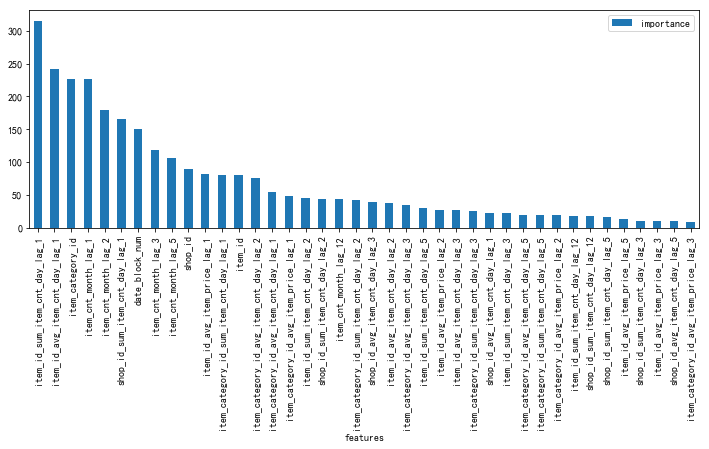

In [30]:
df.plot(kind='bar')

In [42]:
gbm.best_score

defaultdict(dict,
            {'valid_0': {'l2': 0.8745374772301574,
              'rmse': 0.93516708519395475}})

In [62]:
def lgbmfit(params, X_dtrain, y_dtrain, X_dtest, y_dtest,
             early_stopping_rounds=5, num_boost_round=150):
    ## data set ##
    lgb_train = lgb.Dataset(X_dtrain,y_dtrain)
    lgb_val = lgb.Dataset(X_dtest,y_dtest,reference=lgb_train)
    ## model 
    gbm = lgb.train(params,lgb_train,valid_sets=lgb_val,
                    early_stopping_rounds=early_stopping_rounds,
                    num_boost_round=num_boost_round,
                   verbose_eval=False)
    top50_importance = extract_importance(gbm,topn=50)
    top50_importance.plot(kind='bar')    
    print('\nModel Report:')    
    print('best rmse:{:.4f}'.format(gbm.best_score['valid_0']['rmse']))
    return gbm,top50_importance


Model Report:
best rmse:0.9352


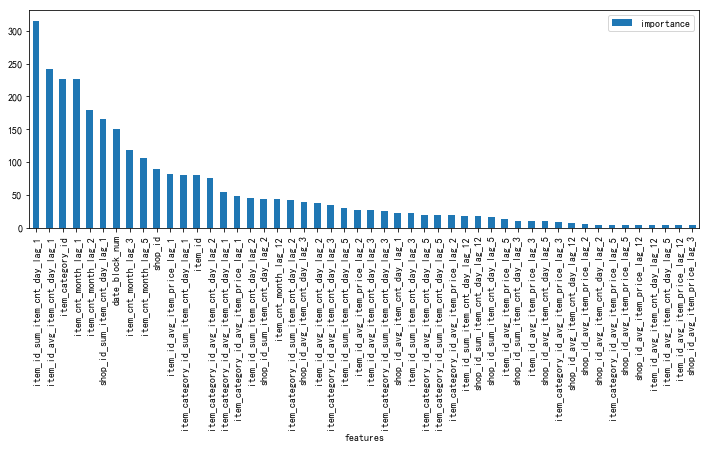

In [61]:
gbm = lgbmfit(params,X_train,y_train,X_val, y_val)

In [63]:
import scipy 